CARGA DE DATOS 

In [50]:
import pandas as pd 
import sqlite3

#Conexión con la base de datos 

conn = sqlite3.connect("north_data.db")

customers = pd.read_sql_query("SELECT * FROM Customers", conn)
orders = pd.read_sql_query("SELECT * FROM Orders", conn)
order_details = pd.read_sql_query("SELECT * FROM OrderDetails", conn)
products = pd.read_sql_query("SELECT ProductID, Price FROM products", conn)

#Cerrar la concexión 

print(order_details.head(2))



   OrderDetailID  OrderID  ProductID  Quantity
0              1    10248         11        12
1              2    10248         42        10


EXPLORACIÓN DE DATOS

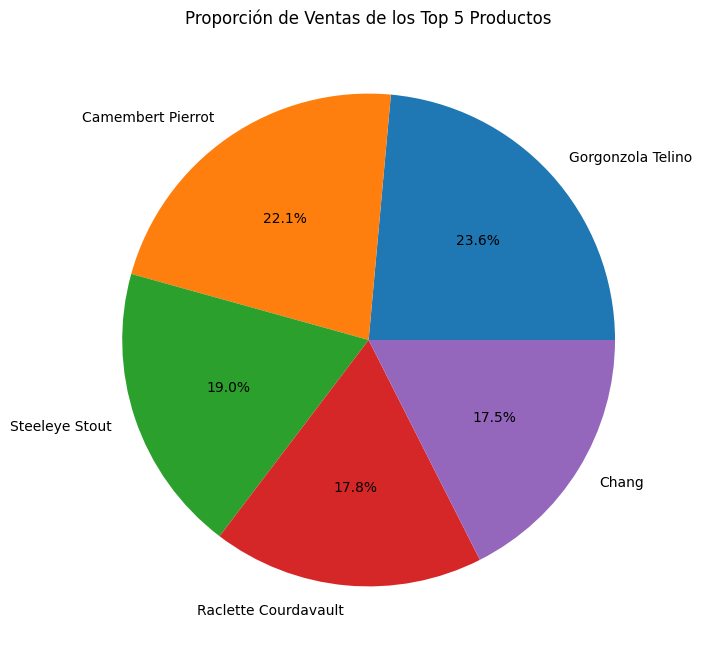

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

#Ventas totales por producto 

sales_per_product = order_details.groupby("ProductID")["Quantity"].sum().reset_index()

#Unir con la tabla de productos para obtener los nombres 

products = pd.read_sql_query("SELECT ProductId, ProductName FROM Products", conn)
merged_data = pd.merge(sales_per_product, products, on = "ProductID")


#Ordenar y tomar los primeros N productos 

top_n = merged_data.sort_values(by="Quantity", ascending=False).head(10)


top_n = merged_data.sort_values(by='Quantity', ascending=False).head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_n['Quantity'], labels=top_n['ProductName'], autopct='%1.1f%%')
plt.title('Proporción de Ventas de los Top 5 Productos')
plt.show()


MACHINE LEARNING LINEAR REGRESION 

In [54]:
#Calcular ventas totales 

data = order_details.merge(products, on="ProductID")
data["TotalSales"] = data["Quantity"] * data["Price"]

#Agrupar por ProductID

data_grouped = data.groupby("ProductID").agg({"TotalSales":"sum","Price" : "mean"})



DIVIDIR EL CONJUNTO DE DATOS

In [55]:
from sklearn.model_selection import train_test_split

X = data_grouped[["Price"]]
y = data_grouped[["TotalSales"]] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)  

ENTRENAR EL MODELO

In [56]:
from sklearn.linear_model import LinearRegression

#Crear y entrenar el modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

HACER PREDICCIONES 

In [60]:
y_pred = model.predict(X_test)

EVALUAR EL MODELO

In [61]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6430141.31922828


VISUALIZAR RESULTADOS

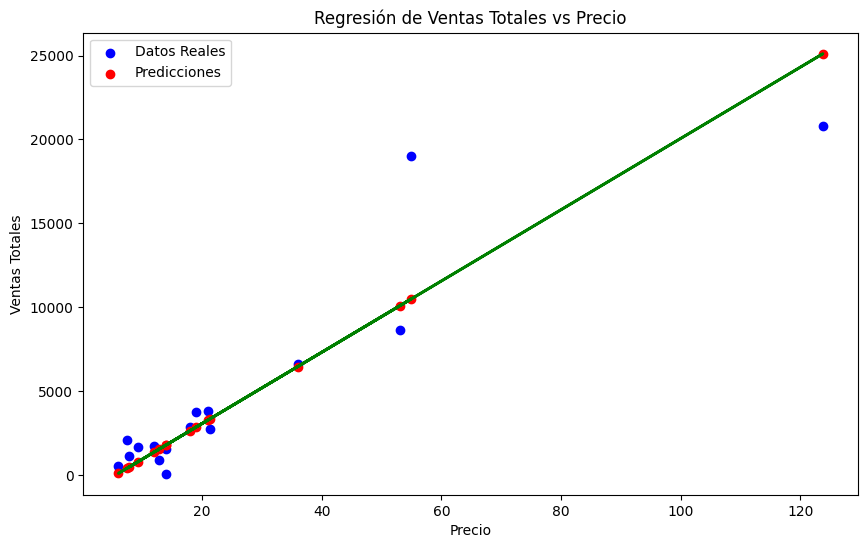

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.title('Regresión de Ventas Totales vs Precio')
plt.xlabel('Precio')
plt.ylabel('Ventas Totales')
plt.legend()
plt.show()